# Pas 1: Se transforma imaginea intr-o reprezentare secventiala (similar textelor) <img  style="vertical-align:middle" src="images/ViT/patchify2.png" width="600"/>

## 1.1 fiecare imagine este “sparta” in patch-uri



De ce e necesar?
- pentru a putea prelucra imagini mai mari prin prelucrarea paralela a patch-urilor
- pentru a avea "acoeprire" mai mare decat o simpla convolutie, dar cu pastrarea caracterului local al feature-urilor extrase 
- pentru a avea modele generale care pot fi folosite pe imagini de dimensiuni diferite (dar a caror patch-uri au aceleasi dimensiuni)

Specificatii:
- Input: <img  style="vertical-align:middle" src="images/ViT/bike.png" width="200"/>
    - imaginea RGB de dimensiune 3 X W x H
    - numarul de patch-uri (pe W, pe H): n_patches

- Output: <img  style="vertical-align:middle" src="images/ViT/bikePatchesWithFrames2.png" width="200"/>
    - vector in 2 dimensiuni cu patch-uri
        - n_patches x n_patches
        - fiecare patch are dimensiunea W / n_patches x H / n_patches

Cum?
- prin divizare 
    
    > in implementare liniile 23-30

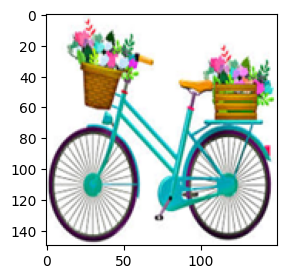

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('images//bike.png')
# image = Image.open('images//ViT/bikeWithFlowers.jpg')
image = image.resize((150, 150))
image_array = np.array(image)

fig, axes = plt.subplots(1, 1, figsize=(3, 3))
axes.imshow(image)
plt.show()

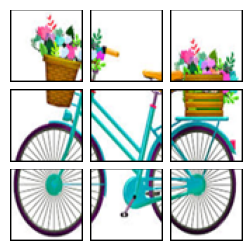

In [4]:
# Define the size of the patches
patch_size = (50, 50)  # Example patch size
# Get the dimensions of the image
image_height, image_width, _ = image_array.shape

# Calculate the number of patches
num_patches_y = image_height // patch_size[0]
num_patches_x = image_width // patch_size[1]

# Split the image into patches
patches = []
for i in range(num_patches_y):
    for j in range(num_patches_x):
        patch = image_array[i * patch_size[0] : (i + 1) * patch_size[0], j * patch_size[1] : (j + 1) * patch_size[1], :]
        patches.append(patch)
        
# Calculate the number of rows and columns in the grid
num_rows = num_patches_y
num_cols = num_patches_x

# Show the plot
# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3, 3))

# Iterate over the patches and plot each patch in a subplot
for i, patch in enumerate(patches):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Add black frame around the patch
    patch_with_frame = np.zeros((patch_size[0]+2, patch_size[1]+2, 3))
    patch_with_frame[1:-1, 1:-1, :] = patch
    
    ax.imshow(patch_with_frame.astype(np.uint8))
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()

## 1.2 matricea de patch-uri este liniarizata



De ce e necesar?
- pentru a avea o reprezentare secventiala (similara secventelor de cuvinte)

Specificatii:
- Input: <img  style="vertical-align:middle" src="images/ViT/bikePatchesWithFrames2.png" width="150"/>
    - vector in 2 dimensiuni cu patch-uri
        - no total de patchuri: n_patches x n_patches
        - Fiecare patch are dimensiunea Dp x Dp = W / n_patches x H / n_patches


- Output: <img  style="vertical-align:middle" src="images/ViT/bikePatchesWithFrames1Row2.png" width="400"/>
    - vector in 1 dimensiune cu patch-uri
        - no total de patchuri: n_patches x n_patches
        - fiecare patch are dimensiunea Dp x Dp = W / n_patches x H / n_patches

Cum?
- prin concatenarea patch-urilor intr-o lista de patch-uri 

    > in implementare linia 31


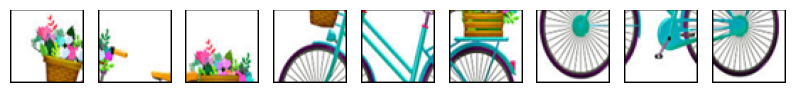

In [5]:
fig, axes = plt.subplots(1, num_patches_x * num_patches_y, figsize=(10, 10))

for i, patch in enumerate(patches):
    # Add black frame around the patch
    patch_with_frame = np.zeros((patch_size[0]+2, patch_size[1]+2, 3))
    patch_with_frame[1:-1, 1:-1, :] = patch
    axes[i].imshow(patch_with_frame.astype(np.uint8))
    axes[i].axis('off')

plt.show()

# Pas 2: se aplica o transformare liniara asupra fiecarui patch <img  style="vertical-align:middle" src="images/ViT/patchLin2.png" width="600"/>

## 2.1 fiecare patch este "aplatizat" (flattening)



De ce e necesar?
- pentru a avea o reprezentare cu o singura dimensiune (array, nu matrice)

Specificatii:
- Input: patch = vector in 3 dimensiuni (cub) cu 3 linii, DP coloane si Dp adancime care contine 3 x Dp x Dp elemente
- Output: vector in 2 dimensiuni cu 3 linii si (Dp * Dp) coloane 

Cum?
- prin concatenarea liniilor fiecarui patch

    > in implementare linia 31

### imagine color

patch shape:  (50, 50, 3)
flatten patch shape:  (2500, 3)


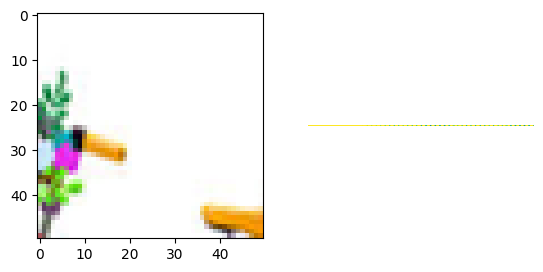

In [6]:
# Flattening one patch
patch = patches[1]
print("patch shape: ", patch.shape)

# Flatten the patch while preserving the RGB format
flattened_patch = patch.reshape(-1, 3)
print("flatten patch shape: ", flattened_patch.shape)

flattened_patch = flattened_patch.transpose()

# Create a new figure and axis
fig, ax = plt.subplots(1,2)
ax[0].imshow(patch)
ax[1].imshow(flattened_patch)
ax[1].axis('off')
plt.show()

### imagine grayscale 

Same steps but for a grayscale image!!! We are going forward with grayscale examples!!

(30, 30)
[[251 214 120 101  72]
 [250 220 111  93  89]
 [253 216 137 127 108]
 [255 192 153 139 111]
 [248 167 158 123 111]]
(900,)
[251 214 120 101  72 165 253 248 250 255 255 255 255 255 255 255 255 254
 253 162  87  94  99 104 110 105 107 116 120 120 250 220 111  93  89]


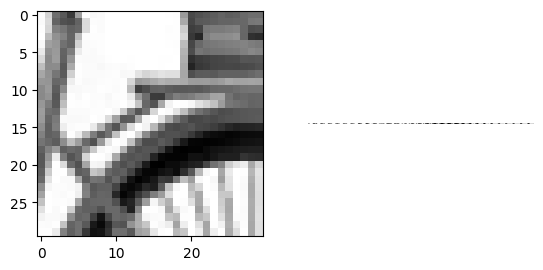

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = Image.open('images//bike.png')
image = image.resize((150, 150))
# Convert the image to grayscale
image = image.convert('L')
image_array = np.array(image)
# Define the size of the patches
patch_size = (30, 30)  # Example patch size
# Get the dimensions of the image
image_height, image_width = image_array.shape
# Calculate the number of patches
num_patches_y = image_height // patch_size[0]
num_patches_x = image_width // patch_size[1]
# Split the image into patches
patches = []
for i in range(num_patches_y):
    for j in range(num_patches_x):
        patch = image_array[i*patch_size[0]:(i+1)*patch_size[0], j*patch_size[1]:(j+1)*patch_size[1]]
        patches.append(patch)

# Flattening one patch
patch = patches[13]
print(patch.shape)
print(patch[:5,:5])
flattened_patch = patch.flatten()
print(flattened_patch.shape)
print(flattened_patch[:35])
# Reshape the flattened patch into a row vector
reshaped_patch = flattened_patch.reshape(1, -1)

# Create a new figure and axis
fig, ax = plt.subplots(1,2)
ax[0].imshow(patch, cmap='gray')
ax[1].imshow(reshaped_patch, cmap='gray')
ax[1].axis('off')
plt.show()

## 2.2 fiecare patch aplatizat este mapat (proiectat) intr-o reprezentare cu un nr diferit de dimensiuni

De ce e necesar?
- modificarea (in special) reducerea dimensiunii
- pt standardizare, adica lucrul cu o reprezentare de lungime fixa, indiferent de dimensiunea patch-ului / imaginii
- transformarea liniara = aplicarea unui filtru, deci extragerea / evidentierea unor caracteristicii ale patch-ului/imaginii

Specificatii:
- Input: vector intr-o dimensiune cu (Dp x Dp) elemente 
- Output: vector intr-o dimensiune cu De elemente 

Cum?
- elemente algebrice:
    Daca presupunem:
    - $x$ un array cu $d1$ elemente si 
    - vrem sa-l mapam intr-un array $y$ cu $d2$ elemente, 

    atunci putem folosi o matrice $A$ de dimensiune $d1 \times d2$ si sa facem $ x \cdot A = y $ pentru ca:

    $ [x_1 \hspace{0.15cm} x_2 \hspace{0.15cm}\ldots \hspace{0.15cm} x_{d1}] \times 
    \begin{bmatrix}
    a_{1,1} & a_{1,2} &  \ldots & a_{1,d2} \\ 
    a_{2,1} & a_{2,2} &  \ldots & a_{2,d2} \\ 
    & & \ldots & \\ 
    a_{d1,1} & a_{d1,2} &  \ldots & a_{d1,d2}
    \end{bmatrix}
     = [ y_1 \hspace{0.15cm} y_2 \hspace{0.15cm} \ldots \hspace{0.15cm} y_{d2}]$

    Sau, mai general, putem folosi o matrice $A$ de dimensiune $d1 \times d2$ si un vector $b$ (bias) cu $d2$ valori a.i. sa facem $ x \cdot A + b= y $ pentru ca:

    $ [x_1 \hspace{0.15cm} x_2 \hspace{0.15cm}\ldots \hspace{0.15cm} x_{d1}] \times 
    \begin{bmatrix}
    a_{1,1} & a_{1,2} &  \ldots & a_{1,d2} \\ 
    a_{2,1} & a_{2,2} &  \ldots & a_{2,d2} \\ 
    & & \ldots & \\ 
    a_{d1,1} & a_{d1,2} &  \ldots & a_{d1,d2}
    \end{bmatrix} + [b_1 \hspace{0.15cm} b_2 \hspace{0.15cm} \ldots \hspace{0.15cm} b_{d2}] = [ y_1 \hspace{0.15cm} y_2 \hspace{0.15cm} \ldots \hspace{0.15cm} y_{d2}]$

- elemente de ML:
    - transformarea lui $x$ in $y$ prin matricea A si vectorul b se numeste "forward pass" in retelele neuronale, adica corespunde "trecerii" valorilor din vectorul $x$ peste un strat dintr-o retea neuronala cu un sg strat ascuns - o retea ce primeste exemple cu $d1$ atribute (deci $d1$ neuroni pe stratul de intrare) si $d2$ neuroni pe stratul ascuns, fiecare cu o functie de activare liniara
    - coeficientii stratului ascuns sunt elementele matricii $A$ si urmeaza sa fie descoperiti prin procesul de antrenare a transformer-ului
    - deci daca avem un patch "aplatizat" (cu o singura linie) cu $Dp \times Dp$ elemente si vrem sa-l mapam intr-un vector de dimensiune $De$, atunci avem nevoie de o matrice $A$ cu $Dp \times Dp$ linii si $ De$ coloane si un vector coloana $b$ cu $De$ elemente.

- Atentie: toate patch-urile trebuie transformate, nu doar unul singur

    > in implementare liniile 120-121 si linia 148: 
    >   - se foloseste un modul nn.Linear care primeste ca parametrii:
    >       - numarul de neuroni pe stratul de intrare (adica nr de pixeli dintr-un patch - $Dp \times Dp$) si
    >       - numarul de neuroni pe stratul ascuns ($De$ in cazul nostru)
    >   - si are rolul sa invete coeficientii matricii de transformare A (eventual si bias-ul b) - valoriile matricii A reprezinta coeficientii retelei neuronale (pt acel strat) care se invata in timpul antrenarii
    >   - in figura, fiecare patch e supus unui "linear embedding" sau "linear projection"; pt fiecare patch se obtine un token (vector) de dimensiune 8, deci pentru o imagine vom avea 49 de tokens de lungime 8, iar pentru tot datasetul vom avea (N, 49, 8) tokens <img  style="vertical-align:middle" src="images/ViT/ViT2.png" alt="softmaxLoss" width="600"/>
<!-- <img  style="vertical-align:middle" src="images/ViT/ViT.png" alt="softmaxLoss" width="600"/> -->


In [7]:
# apply a linear transformation to the flatten patch in PyTorch
import torch
import torch.nn as nn

def patchEmbedding(patch, layer):
    # print("input shape: ", patch.shape)
    # Flattening one patch
    flattened_patch = patch.flatten()
    # print("flatten input shape: ", flattened_patch.shape)
    # Reshape the flattened patch into a row vector
    reshaped_patch = flattened_patch.reshape(-1, 3)

    in_data = flattened_patch 

    # Apply the linear layer to the input data
    output = layer(torch.Tensor(in_data))
    # print("to ouput data shape: ", output.shape)
    return output

def distance(v1, v2):
    return torch.norm(v1 - v2)

De = 8
# Define the linear layer
linear_layer = nn.Linear(in_features=patch.flatten().shape[0], out_features=De)

Distance between patches at positions 0 and 2 is 93.60037


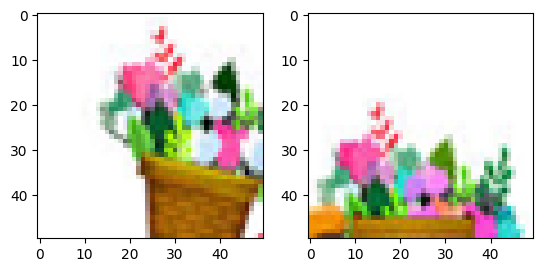

In [140]:
# Calculate the distance between two patches
pos1 = 0; pos2 = 2
embedding1 = patchEmbedding(patches[pos1], linear_layer)
embedding2 = patchEmbedding(patches[pos2], linear_layer)
dist = distance(embedding1, embedding2)

print("Distance between patches at positions", pos1, "and", pos2, "is", dist.data.detach().numpy())
# Create a new figure and axis
fig, ax = plt.subplots(1,2)
ax[0].imshow(patches[pos1])
ax[1].imshow(patches[pos2])
plt.show()

Distance between patches at positions 0 and 8 is 180.37372


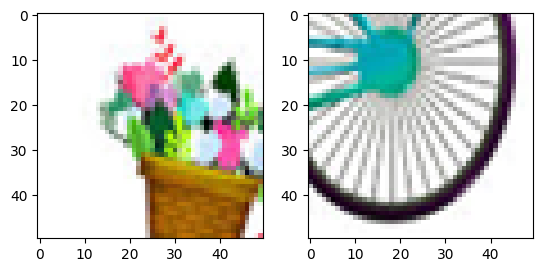

In [141]:
# Calculate the distance between two patches
pos1 = 0; pos2 = 8

embedding1 = patchEmbedding(patches[pos1], linear_layer)
embedding2 = patchEmbedding(patches[pos2], linear_layer)
dist = distance(embedding1, embedding2)
print("Distance between patches at positions", pos1, "and", pos2, "is", dist.data.detach().numpy())
# Create a new figure and axis
fig, ax = plt.subplots(1,2)
ax[0].imshow(patches[pos1])
ax[1].imshow(patches[pos2])
plt.show()

Distance between patches at positions 0 and 3 is 106.44938


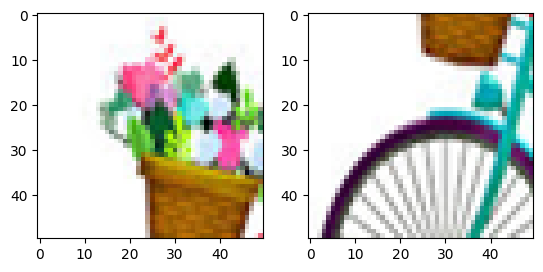

In [142]:
# Calculate the distance between two patches
pos1 = 0; pos2 = 3

embedding1 = patchEmbedding(patches[pos1], linear_layer)
embedding2 = patchEmbedding(patches[pos2], linear_layer)
dist = distance(embedding1, embedding2)
print("Distance between patches at positions", pos1, "and", pos2, "is", dist.data.detach().numpy())
# Create a new figure and axis
fig, ax = plt.subplots(1,2)
ax[0].imshow(patches[pos1])
ax[1].imshow(patches[pos2])
plt.show()

# Pas 4 - calcularea unor embeddinguri de pozitie pt fiecare patch  <img  style="vertical-align:middle" src="images/ViT/patchLinPos3.png" width="600"/>

De ce e necesar?
- este util pt localizarea patch-ului (relativ la imaginea originala) - similar cu a tine cont de relatiile dintre cuvinte intr-o secventa de text. <img  style="vertical-align:middle" src="images/ViT/patchOrder.png" width="200"/>
- Reminder: in transformers, nu se tine cont de ordinea token-urilor (cuvintelor, patch-urilor) dintr-o secventa, ci de relatia dintre ele (prin self-attention)


Specificatii:
- Input: 
    - pt fiecare patch, un vector intr-o dimensiune cu De elemente 
    - numarul total de patch-uri (tokens) - atentie, doar nr - si nr de dimensiuni ale token-ului (De = ? in cazul nostru)
- Output: 
    - vector intr-o dimensiune cu De elemente (imbogatite/imbunatatite)

Cum? 
- Folosind acelasi principiu ca la text (bazat pe sin si cos) - pentru fiecare token se adauga un vector de dimensiune $De$ care contine informatii despre pozitia token-ului in imagine:

$ pos_{i,j} = \left\{ 
    \begin{array}{ll}
    \sin{\frac{i}{1000^{\frac{j}{De}}}}, & \text{if } j \text{ is even} \\
    \cos{\frac{i}{1000^{\frac{j - 1}{De}}}}, & \text{if } j \text{ is odd}
    \end{array}
    \right. 
  $ unde $i$ este indexul token-ului (patch-ului) si $j$ este indexul elementului din vectorul de dimensiune $De$ asociat token-ului.

- agregarea (prin adunare) a embeddingurilor de patch-uri cu embeddingurile de pozitie

    > in implementare, clasa MyVit, liniile 127-131 si linia 154 (adunarea embeddingurilor de patch-uri cu cele de pozitie) 

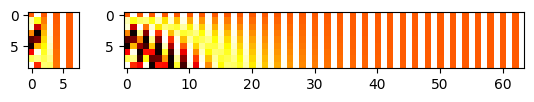

In [8]:

def get_positional_embeddings(sequence_length, De):
    n = 10000
    result = np.zeros((sequence_length,De))
    for i in range(sequence_length):
        for j in range(De):
            result[i][j] = np.sin(i / (10000 ** (j / De))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / De)))
    return result

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 8]})
ax[0].imshow(get_positional_embeddings(9, 8), cmap="hot", interpolation="nearest")
ax[1].imshow(get_positional_embeddings(9, 64), cmap="hot", interpolation="nearest")
plt.show()

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

 # apply a linear transformation to the flatten patch in PyTorch
import torch
import torch.nn as nn

def patchEmbedding(patch, layer):
    # print("input shape: ", patch.shape)
    # Flattening one patch
    flattened_patch = patch.flatten()
    # print("flatten input shape: ", flattened_patch.shape)
    # Reshape the flattened patch into a row vector
    reshaped_patch = flattened_patch.reshape(-1, 3)

    in_data = flattened_patch 

    # Apply the linear layer to the input data
    output = layer(torch.Tensor(in_data))
    # print("to ouput data shape: ", output.shape)
    return output

def distance(v1, v2):
    return torch.norm(v1 - v2)

def computeEmbeddings(imageName, linear_layer, patch_size):
    # Load the image
    image = Image.open(imageName)
    image = image.resize((200, 200))
    image_array = np.array(image)

    # Define the size of the patches
     # Example patch size
    # Get the dimensions of the image
    image_height, image_width, _ = image_array.shape

    # Calculate the number of patches
    num_patches_y = image_height // patch_size[0]
    num_patches_x = image_width // patch_size[1]

    # Split the image into patches
    patches = []
    for i in range(num_patches_y):
        for j in range(num_patches_x):
            patch = image_array[i * patch_size[0] : (i + 1) * patch_size[0], j * patch_size[1] : (j + 1) * patch_size[1], :]
            patches.append(patch)
            
    fig, axes = plt.subplots(1, 1 + num_patches_x * num_patches_y, figsize=(3, 3))
    axes[0].imshow(image)
    axes[0].axis('off')
    for i, patch in enumerate(patches):
        # Add black frame around the patch
        patch_with_frame = np.zeros((patch_size[0]+2, patch_size[1]+2, 3))
        patch_with_frame[1:-1, 1:-1, :] = patch
        axes[i + 1].imshow(patch_with_frame.astype(np.uint8))
        axes[i + 1].axis('off')
    plt.show()

    embedding1 = patchEmbedding(patches[0], linear_layer).detach().numpy()
    embedding2 = patchEmbedding(patches[1], linear_layer).detach().numpy()
    embedding3 = patchEmbedding(patches[2], linear_layer).detach().numpy()
    embedding4 = patchEmbedding(patches[3], linear_layer).detach().numpy()
    
    embs = np.array([embedding1, embedding2, embedding3, embedding4])
    return embs

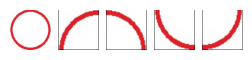

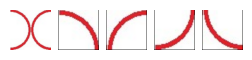

Similarity between embs1 and embs2: 0.9672133
Similarity between embs1+posEmb and embs2+posEmb: 0.9706938552350127


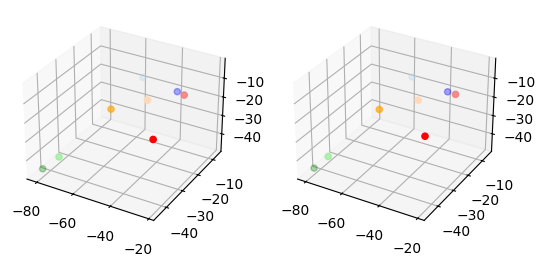

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity


De = 3
    # Define the linear layer
linear_layer = nn.Linear(100*100*3, out_features=De)
patch_size = (100, 100) 
embs1 = computeEmbeddings('images//ViT//circle.jpg', linear_layer, patch_size)
embs2 = computeEmbeddings('images//ViT//circle2.jpg', linear_layer, patch_size)
newembs1 = embs1 + get_positional_embeddings(4, De)
newembs2 = embs2 + get_positional_embeddings(4, De)
similarity = cosine_similarity(embs1, embs2)
similarityPos = cosine_similarity(newembs1, newembs2)

# print("distance between the patch1 (circle) and patch2 (circle2), based on emb: ", embs1[0] - embs2[1])
# print("distance between the patch1 (circle) and patch2 (circle2), based on emb + posEmb: ", newembs1[0] - newembs2[1])
print("Similarity between embs1 and embs2:", similarity[0][1])
print("Similarity between embs1+posEmb and embs2+posEmb:", similarityPos[0][1])

fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'})
axes[0].scatter(embs1[:, 0], embs1[:, 1], embs1[:, 2], c=['red', 'blue', 'green', 'orange'])
axes[0].scatter(embs2[:, 0], embs2[:, 1], embs2[:, 2], c=['lightblue', 'lightcoral', 'peachpuff', 'lightgreen'])
axes[1].scatter(newembs1[:, 0], newembs1[:, 1], newembs1[:, 2], c=['red', 'blue', 'green', 'orange'])
axes[1].scatter(newembs2[:, 0], newembs2[:, 1], newembs2[:, 2], c=['lightblue', 'lightcoral', 'peachpuff', 'lightgreen'])
plt.show()

# Pas 4 - adaugarea unui token de clasificare ("[CLS] token") la inceputul secventei de token-uri   <img  style="vertical-align:middle" src="images/ViT/clsToken.png" width="600"/>

De ce e necesar?
- pentru a agrega informatii despre intreaga secventa de patch-uri
- este util modelului de clasificare pentru a lua decizii pe baza informatiilor agregate (e folosit ca input in head-ul de clasificare) si foarte utila in task-uri de transfer learning
- se comporta ca oricare alt token (in etapa de calculare a atentiei), dar este folosit pentru a clasifica imaginea
- pt eficienta: are o reprezentare unica si de lungime fixa pentru orice secventa de patch-uri (sau cuvinte/texte)
- pt flexibilitate: permite modelului sa se antreneze pe mai multe task-uri fara a modifica arhitectura modelului
- se initializeaza ca un token special cu un embedding unic (indiferent de continutul patch-urilor, respectiv al embedding-urilor asociate acestor patch-uri si nu are componenta de "positional embedding")

Specificatii:
- Input: numarul de elemente al unui embedding de patch (De in cazul nostru)
- Output: pentru fiecare secventa de patch-uri, cate un token de clasificare cu un embedding cu De elemente

Cum?
- initializare aleatoare a vectorului cu De elemente

    > in implementare, in clasa MyViT, linia 124 si linia 151

# Pas 5 - blocul de transformer (Encoder-ul)  <img  style="vertical-align:middle" src="images/ViT/transformer.png" width="600"/> <img  style="vertical-align:middle" src="images/ViT/encoder.png" width="200"/>

De ce e necesar?
- pentru a invata relatii dintre patch-uri (similar cu invatarea relatiilor dintre cuvinte in NLP)

Specificati:
- input: Proceseaza ca input vectori (embedding-urile anterior calculate, fiecare cu cate De elemente)
- output: Returneaza ca output vectori (embedding-urile rezultate, fiecare cu cate De elemente)

Cum?
- similar cu blocul de transformer din NLP
- 3 layere principale: normalizare, self-attention, conexiuni reziduale

## 5.1 Normalizarea

De ce e necesara?
- pentru a compara "mere cu mere si pere cu pere" la nivelul fiecarei secvente de patch-uri

Specificatii:
- Input: $n + 1$ vectori cu De elemente (n patch-uri plus un token de clasificare reprezentate prin De elemente)
- Output: $n + 1$ vectori cu De elemente (n patch-uri plus un token de clasificare) normalizate

Cum?
- normalizare statistica $x' = \frac{x- \mu}{\sigma}$, unde $\mu$ este media si $\sigma$ este deviatia standard a vectorului $x$ 
    
    > in implementare, linia 83 (in clasa MyViTBlock)

## 5.2 Multi-Head Self-Attention <img  style="vertical-align:middle" src="images/ViT/MSA.png" width="600"/>

De ce e necesar?
- deoarece vrem ca reprezentarea fiecarui patch (embedding-ul) sa fie actualizat pe baza similaritatii patch-ului cu celelalte patch-uri din imaginea curenta
- e responsabil cu "procesarea" localizarii spatiale a informatiei din imagine (urmand ca MLP-ul din head sa proceseze informatiile din mai multe canale ale imaginii)
    - element diferit de convolutii (cu filtre de dimensiune > 1) care proceseaza informatii de pe canale su locatii diferite ale imaginii deodata

Specificatii:
- Input: $n + 1$ vectori cu De elemente (n patch-uri plus un token de clasificare reprezentate prin De elemente) - se poate nota inputul cu x (o matrice cu n + 1 linii si De coloane)
- Output: $n + 1$ vectori cu De elemente (n patch-uri plus un token de clasificare)

Cum?
- pentru un mecanism de atentie (cu un singur head) am avea:
    - prin maparea fiecarui patch (reprezentat prin cele De elemente) in 3 vectori (query, key si value), calcularea produsului scalar intre query si key si normalizarea producsului (obtinandu-se indicii de atentie), aplicarea unui softmax (ponderi de atentie) si inmultirea cu value; in final agregarea rezultatelor. Altfel spus::
        - Calcularea a 3 vectori pt fiecare patch (aplatizat si proiectat linear in reprezentarea cu De elemente): 
            - Query, Key, Value. 
            - Cei 3 vectori au dimensiunea D (D poate fi diferit de De)
            - Cum? Prin folosirea a 3 matrici WQ, WK si WV de dimensiune De x D; Pt fiecare patch: <img  style="vertical-align:middle" src="images/ViT/QKV.png" width="200"/>
                - qi = xi * WQ
                - ki = xi * WK
                - vi = xi * WV
        - calcularea unor similaritati intre patch-ul curent (query-ul qi) si toate celelalte patch-uri (toate key-urile kj, j = 1,n): $[ qi * k1, qi * k2, \ldots, qi * k9]$
            - e o operatie invarianta la permutarea patch-urilor -> de aceea e nevoie de embedding-urile de pozitie (Care retin locatia intiala a patch-urilor)
            - e o operatie globala (care agrega informatii de la toate patch-urile) 
        - Normalizarea/scalarea similaritatii cu sqrt(D) - de ce? Pt a avea gradient mult mai stabili
        - Transformarea valorilor in ponderi (weights) prin aplicarea unui softmax -> scores
        - Maparea scorurilor peste valorile values asociate patch-urilor: Score1 *vi1, score 2 *vi2, …, score9 * vi9
        - agregarea rezultatelor: prin insumarea valorilor ponderate
- pentru un mecanism de atentie (cu mai multea head-uri = $noHEads$) am avea:
    - repetarea procesului anterior de #noHeads$ ori, dar in loc sa se foloseasca ca input toate cele De elemente ale unui embedding se vor folosi doar cate $De / noHeads$ elemente (se va face un "split" al embedding-ului in $noHeads$ parti) si se va aplica acelasi proces de mai sus pentru fiecare parte
    - stack-urirea rezultatelor obtinute de catre fiecare head <img  style="vertical-align:middle" src="images/ViT/mha.png" width="600"/>

    > in implementare avem clasa MyMSA in care se calculeaza query, key si value (liniile 44-52), se calculeaza produsul scalar intre query si key, se normalizeaza si se aplica softmax (linia 64-71). Maparea scorurilor peste valori si agregarea se face in linia 72.

## 5.3 Conexiuni reziduale

De ce e necesar?
- pentru a preveni "vanishing gradient problem" si pentru a imbunatati procesul de antrenare

Specificati:
- Input:
- Output:

Cum?
- adaugarea unor informatii (features la o anumita granularitate) la output-ul unui strat de procesare (de la o granularitate diferita), urmate de normalizare
    
    > in implementare, in clasa MyViTblock, linia 93 si 94


# Pas 6 - blocul de clasificare   <img  style="vertical-align:middle" src="images/ViT/classScores.png" width="600"/>

De ce e necesar?
- ca sa interpreteze embedding-urile produse de transformer (in special embedding-ul asociat token-ului [CLS] ) si sa le map-eze in label-uri

Specificatii:
- Input: un vector cu D elemente (embedding-ul token-ului [CLS] produs de transformer)
- Output: un vector cu C elemente (unde C este numarul de clase) de tip probabilitati cu suma 1 (confidentele in cele C clase)

Cum?
- folosirea unor layere fully connected peste embedding (un MLP)
    - activare ReLU sau GELU (Gaussian Error Linear Unit) - GELU nu are limitarile lui ReLU in ceea ce priveste ne-diferentiabilitatea in 0
- un ultim layer de tip softmax (problema de clasificare cu C clase)

    > in implementare, in clasa MyViT, linia 139 si 163

Patch Embedding:

The image is divided into patches of size ( p \times p ).
Number of patches: $( \frac{n \times m}{p^2} )$.
Each patch is flattened and projected to a ( d )-dimensional embedding.
Operations for patch embedding: $[ \text{Operations} = \left( \frac{n \times m}{p^2} \right) \times (p^2) \times d = n \times m \times d ]$
Self-Attention:

Query, Key, and Value Projections: $[ \text{Operations for projections} = 3 \times \left( \frac{n \times m}{p^2} \right) \times d^2 = 3 \times \frac{n \times m \times d^2}{p^2} ]$

Dot Products: $[ \text{Dot products} = \left( \frac{n \times m}{p^2} \right)^2 \times d = \frac{n^2 \times m^2 \times d}{p^4} ]$

Softmax Operations: $[ \text{Softmax operations} = \left( \frac{n \times m}{p^2} \right)^2 = \frac{n^2 \times m^2}{p^4} ]$

Weighted Sum: $[ \text{Weighted sum operations} = \left( \frac{n \times m}{p^2} \right)^2 \times d = \frac{n^2 \times m^2 \times d}{p^4} ]$

Total Operations for Self-Attention: $[ \text{Total operations} = 3 \times \frac{n \times m \times d^2}{p^2} + 2 \times \frac{n^2 \times m^2 \times d}{p^4} + \frac{n^2 \times m^2}{p^4} ]$

Convolutional Neural Network (CNN)

Convolution Operation:
For a single $( 3 \times 3 )$ filter: $[ \text{Operations per position} = 9 \text{ multiplications} + 8 \text{ additions} = 17 \text{ operations} ]$

Assuming the output feature map size is $( (n-2) \times (m-2) )$ (no padding, stride 1): $[ \text{Total operations} = (n-2) \times (m-2) \times 17 \approx n \times m \times 17 ]$

Comparison

Visual Transformer: $[ \text{Total operations} = n \times m \times d + 3 \times \frac{n \times m \times d^2}{p^2} + 2 \times \frac{n^2 \times m^2 \times d}{p^4} + \frac{n^2 \times m^2}{p^4} ]$

CNN: $[ \text{Total operations} \approx n \times m \times 17 ]$

Efficiency Considerations
- CNNs are generally more efficient for local feature extraction due to their linear complexity with respect to the input size.
- Transformers can capture long-range dependencies and relationships but have higher computational complexity, especially for large images.

In summary, while CNNs are more efficient for local processing, Transformers offer greater flexibility and are more powerful for tasks requiring global context, despite their higher computational cost.

Would you like to explore any specific details or further comparisons?

Certainly! Let's compare the number of operations for a simple CNN and a Transformer when processing a grayscale image of \( 512 \times 512 \) pixels.

### CNN Example

#### Layer 1: First Convolutional Layer
- **Input**: \( 512 \times 512 \) pixels
- **Filter**: \( 3 \times 3 \)
- **Number of Filters**: 32
- **Output Size**: \( 510 \times 510 \) (assuming no padding and stride of 1)
- **Operations**:
  \[
  \text{Operations} = 510 \times 510 \times 32 \times 9 = 74,491,200
  \]

#### Layer 2: Second Convolutional Layer
- **Input**: \( 510 \times 510 \) pixels
- **Filter**: \( 3 \times 3 \)
- **Number of Filters**: 64
- **Output Size**: \( 508 \times 508 \)
- **Operations**:
  \[
  \text{Operations} = 508 \times 508 \times 64 \times 9 = 148,803,072
  \]

#### Layer 3: Third Convolutional Layer
- **Input**: \( 508 \times 508 \) pixels
- **Filter**: \( 3 \times 3 \)
- **Number of Filters**: 128
- **Output Size**: \( 506 \times 506 \)
- **Operations**:
  \[
  \text{Operations} = 506 \times 506 \times 128 \times 9 = 295,384,704
  \]

#### Total Operations for CNN
\[
\text{Total Operations} = 74,491,200 + 148,803,072 + 295,384,704 = 518,678,976
\]

### Transformer Example

#### Patch Embedding
- **Patch Size**: \( 16 \times 16 \)
- **Number of Patches**: \( \frac{512 \times 512}{16 \times 16} = 1024 \)
- **Embedding Dimension**: \( d = 64 \)
- **Operations**:
  \[
  \text{Operations} = 1024 \times (16 \times 16) \times 64 = 16,777,216
  \]

#### Self-Attention Layer
- **Input Dimension**: \( d = 64 \)
- **Hidden Size**: \( d_{\text{model}} = 64 \)
- **Operations for Projections**:
  \[
  \text{Operations} = 3 \times 1024 \times 64 \times 64 = 12,582,912
  \]
- **Dot Products**:
  \[
  \text{Operations} = 1024 \times 1024 \times 64 = 67,108,864
  \]
- **Softmax Operations**:
  \[
  \text{Operations} = 1024 \times 1024 = 1,048,576
  \]
- **Weighted Sum**:
  \[
  \text{Operations} = 1024 \times 1024 \times 64 = 67,108,864
  \]

#### Feed-Forward Layer
- **Hidden Dimension**: \( d_{\text{ff}} = 256 \)
- **Operations**:
  \[
  \text{Operations} = 1024 \times 64 \times 256 + 256 + 256 \times 64 \times 1024 + 1024 = 33,554,432 + 256 + 33,554,432 + 1024 = 67,110,144
  \]

#### Total Operations for Transformer
\[
\text{Total Operations} = 16,777,216 + 12,582,912 + 67,108,864 + 1,048,576 + 67,108,864 + 67,110,144 = 231,736,576
\]

### Summary
- **CNN**: 518,678,976 operations
- **Transformer**: 231,736,576 operations

While the CNN has a higher number of operations due to the multiple convolutional layers, the Transformer, despite its quadratic complexity, can be more efficient in terms of operations for certain configurations. This efficiency comes from the parallel processing capabilities and the ability to capture long-range dependencies more effectively.

Would you like to explore any specific details or further comparisons?